# **Introduction**
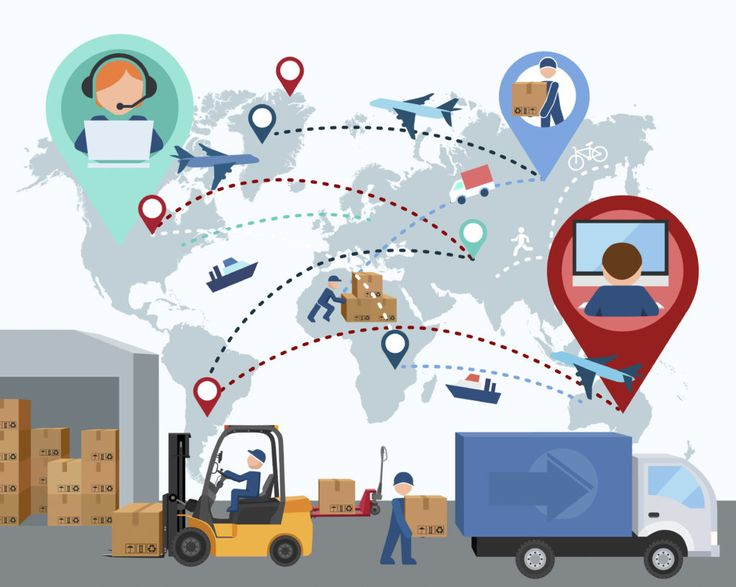

This project analyzes a Supply Chain Management System (SCMS) Delivery History Dataset to understand the factors influencing shipment modes and predict the most efficient mode for future deliveries. The dataset contains information on various aspects of shipments, including delivery dates, freight costs, shipment modes, and destinations.

# **Project Objective**
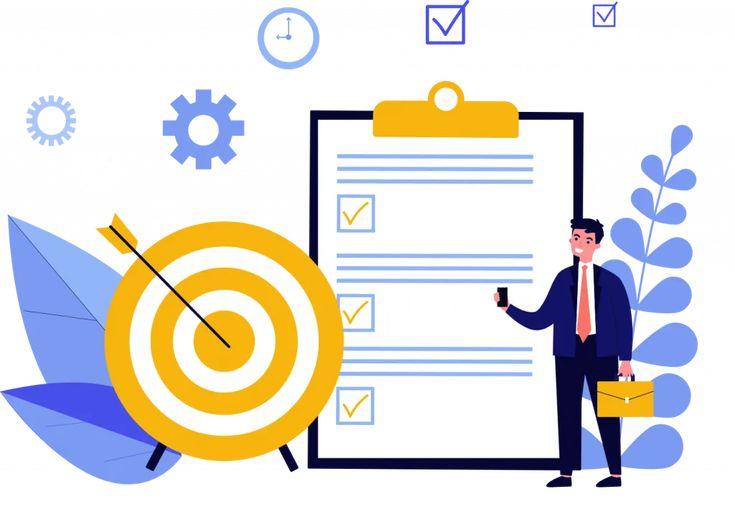


The project involves the following steps:

**Data Collection and Preprocessing:** Importing necessary libraries, loading the dataset, handling missing values, and converting data types.

**Descriptive Analysis and Data Exploration:**
Examining the dataset's characteristics, distributions, and relationships between variables using descriptive statistics and visualizations.

**Feature Engineering and Selection:** Extracting relevant features like delivery time, delay in delivery, and encoding categorical variables for modeling.

**Model Training and Evaluation:** Applying machine learning models (Random Forest, Support Vector Classification, Logistic Regression, and KNN) to predict shipment modes and evaluating their performance using metrics like accuracy, precision, recall, F1-score, and ROC AUC.

**Hyperparameter Tuning and Model Optimization:**
Fine-tuning the best-performing model to improve its predictive accuracy.



# **Importing libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# **Data Collection**

In [ ]:
df = pd.read_csv("/content/sample_data/SCMS_Delivery_History_Dataset.csv")

In [ ]:
#Checking top 5 rows
df.head(5)

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,...,30,19,551.0,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,NaN
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,...,240,1000,6200.0,6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,NaN
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,...,100,500,40000.0,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,NaN
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,31920,127360.8,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,NaN
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,38000,121600.0,3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,NaN


# Descriptive Analysis & Data Exploration

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            10324 non-null  int64  
 1   Project Code                  10324 non-null  object 
 2   PQ #                          10324 non-null  object 
 3   PO / SO #                     10324 non-null  object 
 4   ASN/DN #                      10324 non-null  object 
 5   Country                       10324 non-null  object 
 6   Managed By                    10324 non-null  object 
 7   Fulfill Via                   10324 non-null  object 
 8   Vendor INCO Term              10324 non-null  object 
 9   Shipment Mode                 9964 non-null   object 
 10  PQ First Sent to Client Date  10324 non-null  object 
 11  PO Sent to Vendor Date        10324 non-null  object 
 12  Scheduled Delivery Date       10324 non-null  object 
 13  D


**Observation:**

10324 enttries and 33 columns are there out of which few have null values

In [ ]:

pd.set_option("display.max_columns",None)
df.head(2)

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,PQ First Sent to Client Date,PO Sent to Vendor Date,Scheduled Delivery Date,Delivered to Client Date,Delivery Recorded Date,Product Group,Sub Classification,Vendor,Item Description,Molecule/Test Type,Brand,Dosage,Dosage Form,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,02-Jun-06,02-Jun-06,02-Jun-06,HRDT,HIV test,RANBAXY Fine Chemicals LTD.,"HIV, Reveal G3 Rapid HIV-1 Antibody Test, 30 T...","HIV, Reveal G3 Rapid HIV-1 Antibody Test",Reveal,NaN,Test kit,30,19,551.0,29.0,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,NaN
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,14-Nov-06,14-Nov-06,14-Nov-06,ARV,Pediatric,Aurobindo Pharma Limited,"Nevirapine 10mg/ml, oral suspension, Bottle, 2...",Nevirapine,Generic,10mg/ml,Oral suspension,240,1000,6200.0,6.2,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,NaN


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,10324.0,51098.968229,31944.332496,1.0,12795.7500,57540.500,83648.2500,86823.00
Unit of Measure (Per Pack),10324.0,77.990895,76.579764,1.0,30.0000,60.000,90.0000,1000.00
Line Item Quantity,10324.0,18332.534870,40035.302961,1.0,408.0000,3000.000,17039.7500,619999.00
Line Item Value,10324.0,157650.567347,345292.066979,0.0,4314.5925,30471.465,166447.1400,5951990.40
Pack Price,10324.0,21.910241,45.609223,0.0,4.1200,9.300,23.5925,1345.64
Unit Price,10324.0,0.611701,3.275808,0.0,0.0800,0.160,0.4700,238.65
Line Item Insurance (USD),10037.0,240.117626,500.190568,0.0,6.5100,47.040,252.4000,7708.44


# Data Preprocessing and Handling Missing Values

In [ ]:
# Changing the data type of the columns from Object to Datetime
import datetime

date_columns = [
    "PQ First Sent to Client Date","PO Sent to Vendor Date","Scheduled Delivery Date","Delivered to Client Date","Delivery Recorded Date"
]

for col in date_columns:
  df[col]= pd.to_datetime(df[col],errors="coerce")


<ipython-input-9-d1b4ce9fcc5c>:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col]= pd.to_datetime(df[col],errors="coerce")
<ipython-input-9-d1b4ce9fcc5c>:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col]= pd.to_datetime(df[col],errors="coerce")
<ipython-input-9-d1b4ce9fcc5c>:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col]= pd.to_datetime(df[col],errors="coerce")
<ipython-input-9-d1b4ce9fcc5c>:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, 

Changing the data types for the columns

In [ ]:
#Changing the data type of Weight (Kilograms) and Freight Cost (USD) as it is in "Object" type
df["Weight (Kilograms)"]=pd.to_numeric(df["Weight (Kilograms)"],errors="coerce")
df["Freight Cost (USD)"]=pd.to_numeric(df["Freight Cost (USD)"],errors="coerce")


# Handling Missing Value

In [ ]:
df.isnull().sum()

,0
ID,0
Project Code,0
PQ #,0
PO / SO #,0
ASN/DN #,0
Country,0
Managed By,0
Fulfill Via,0
Vendor INCO Term,0
Shipment Mode,360


In [ ]:
#Filling the missing values for categorical columns
df["Shipment Mode"].fillna(df["Shipment Mode"].mode()[0],inplace=True)

#Using Mode to fill the Dosage as its dtype is Object
df["Dosage"].fillna(df["Dosage"].mode()[0],inplace=True)


<ipython-input-12-fc63c8576a31>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Shipment Mode"].fillna(df["Shipment Mode"].mode()[0],inplace=True)
<ipython-input-12-fc63c8576a31>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, in

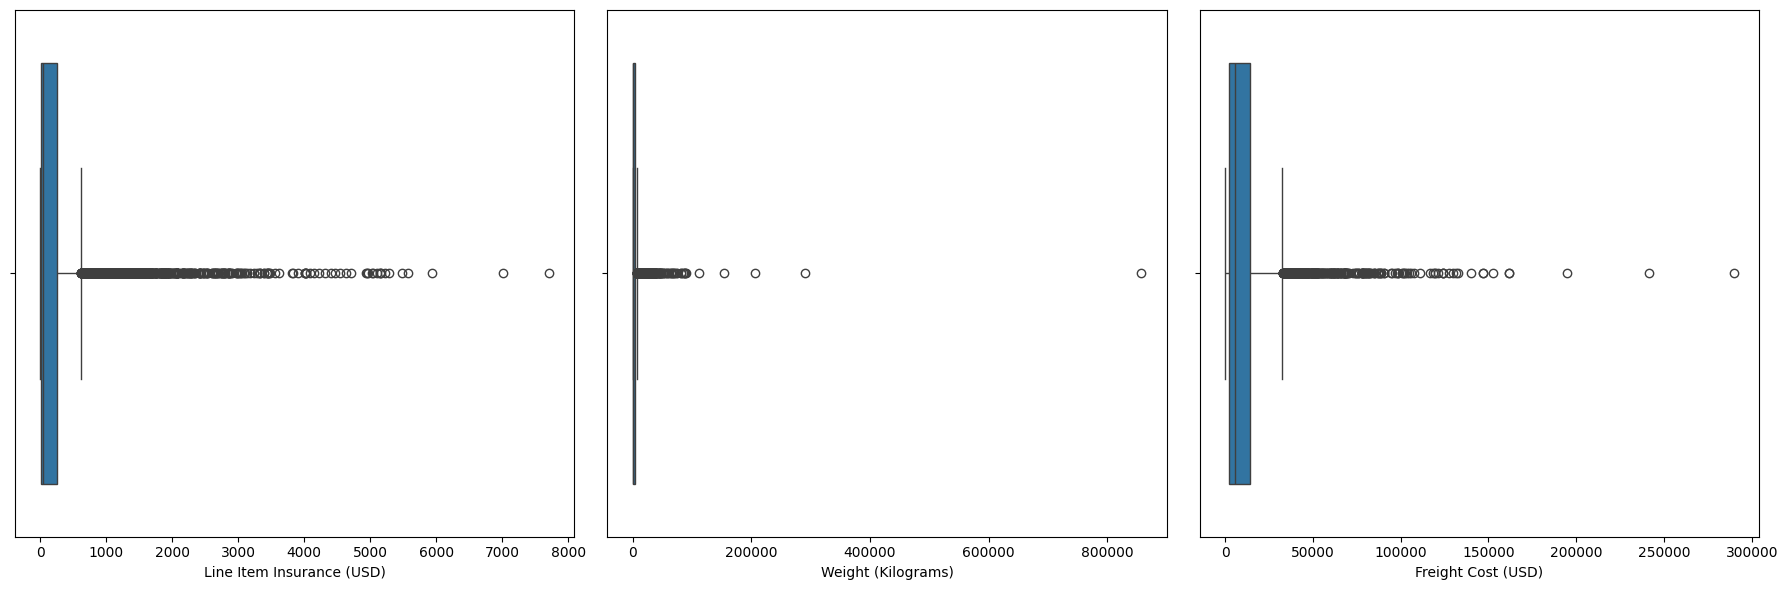

In [ ]:
#Creating figure and subplots
fig, axes = plt.subplots(1, 3, figsize=(18,6))


sns.boxplot(data=df,x="Line Item Insurance (USD)",ax=axes[0])
axes[0].set_xlabel("Line Item Insurance (USD)")

sns.boxplot(data=df,x="Weight (Kilograms)",ax=axes[1])
axes[1].set_xlabel("Weight (Kilograms)")

sns.boxplot(data=df,x="Freight Cost (USD)",ax=axes[2])
axes[2].set_xlabel("Freight Cost (USD)")


plt.tight_layout()
plt.show()


In [ ]:
#Filling the missing values for numerical columns

#Since there are alot of outliers we will use median to fill the missing values
df["Weight (Kilograms)"].fillna(df["Weight (Kilograms)"].median(),inplace=True)
df["Freight Cost (USD)"].fillna(df["Freight Cost (USD)"].median(),inplace=True)
df["Line Item Insurance (USD)"].fillna(df["Line Item Insurance (USD)"].median(),inplace=True)

<ipython-input-14-91e6a898afc5>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Weight (Kilograms)"].fillna(df["Weight (Kilograms)"].median(),inplace=True)
<ipython-input-14-91e6a898afc5>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(

In [ ]:
#Dropping the null values -PQ First Sent to Client Date,PO Sent to Vendor Date

df.dropna(subset=["PQ First Sent to Client Date","PO Sent to Vendor Date"],inplace=True)

In [ ]:
# #Checking for duplicate values if any
df.duplicated().sum()            #No duplicate values are there

0

# **Data Extraction**

In [ ]:
#To get the first characters before the hyphen(-)
df["PQ #"]=df["PQ #"].str.split(pat="-",expand=True)[0].apply(lambda x:x.strip())
print(df["PQ #"].nunique())

df["PO / SO #"]=df["PO / SO #"].str.split(pat="-",expand=True)[0].apply(lambda x:x.strip())
print(df["PO / SO #"].nunique())

df["ASN/DN #"]=df["ASN/DN #"].str.split(pat="-",expand=True)[0].apply(lambda x:x.strip())
print(df["ASN/DN #"].nunique())

df["Project Code"]=df["Project Code"].str.split(pat="-",expand=True)[1].apply(lambda x:x.strip())
print(df["Project Code"].nunique())

1
1
1
38


In [ ]:
df.columns

Index(['ID', 'Project Code', 'PQ #', 'PO / SO #', 'ASN/DN #', 'Country',
       'Managed By', 'Fulfill Via', 'Vendor INCO Term', 'Shipment Mode',
       'PQ First Sent to Client Date', 'PO Sent to Vendor Date',
       'Scheduled Delivery Date', 'Delivered to Client Date',
       'Delivery Recorded Date', 'Product Group', 'Sub Classification',
       'Vendor', 'Item Description', 'Molecule/Test Type', 'Brand', 'Dosage',
       'Dosage Form', 'Unit of Measure (Per Pack)', 'Line Item Quantity',
       'Line Item Value', 'Pack Price', 'Unit Price', 'Manufacturing Site',
       'First Line Designation', 'Weight (Kilograms)', 'Freight Cost (USD)',
       'Line Item Insurance (USD)'],
      dtype='object')

## **Data Visualization**

In [ ]:
#Using plotly for data visualization
import plotly.express as px

Shipment_Count = df["Shipment Mode"].value_counts()
px.bar(x=Shipment_Count.index,
       y=Shipment_Count.values,
       color=Shipment_Count.index,
       labels={"x":"Shipment Mode","y":"Count"})

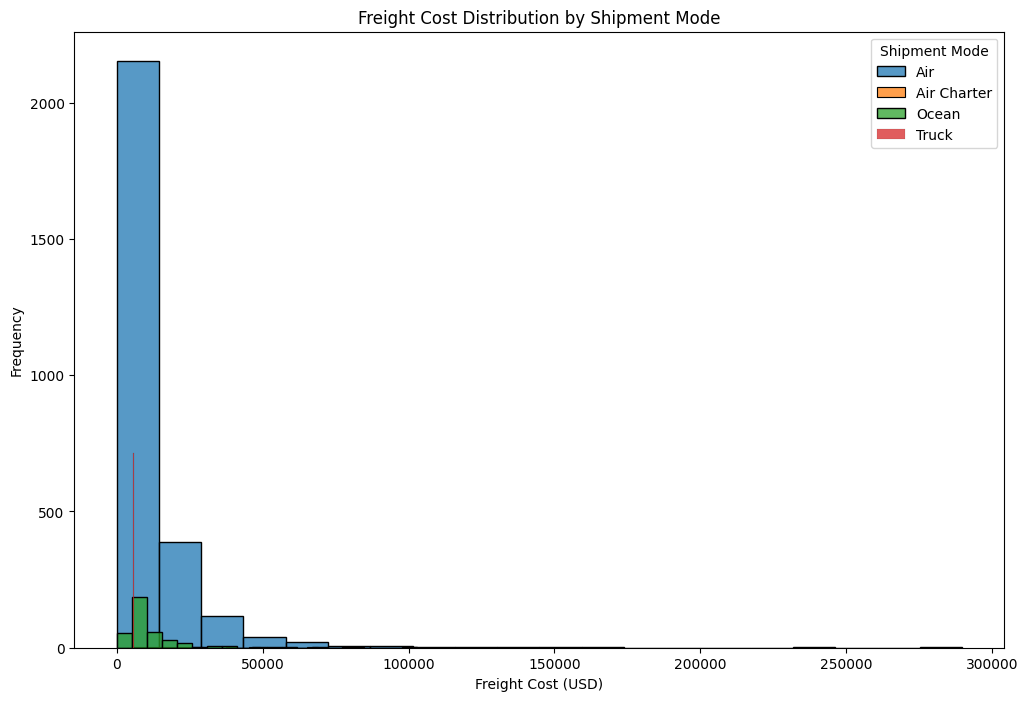

In [ ]:
# Creating a figure
plt.figure(figsize=(12, 8))

# Group by Shipment Mode and plot histograms for Freight Cost (USD)
for shipment_mode, group in df.groupby("Shipment Mode"):
    sns.histplot(group["Freight Cost (USD)"], kde=False, label=shipment_mode, bins=20)

# Adding the title and labels
plt.title("Freight Cost Distribution by Shipment Mode")
plt.xlabel("Freight Cost (USD)")
plt.ylabel("Frequency")
plt.legend(title="Shipment Mode")

# Show the plot
plt.show()


Temporal Analysis

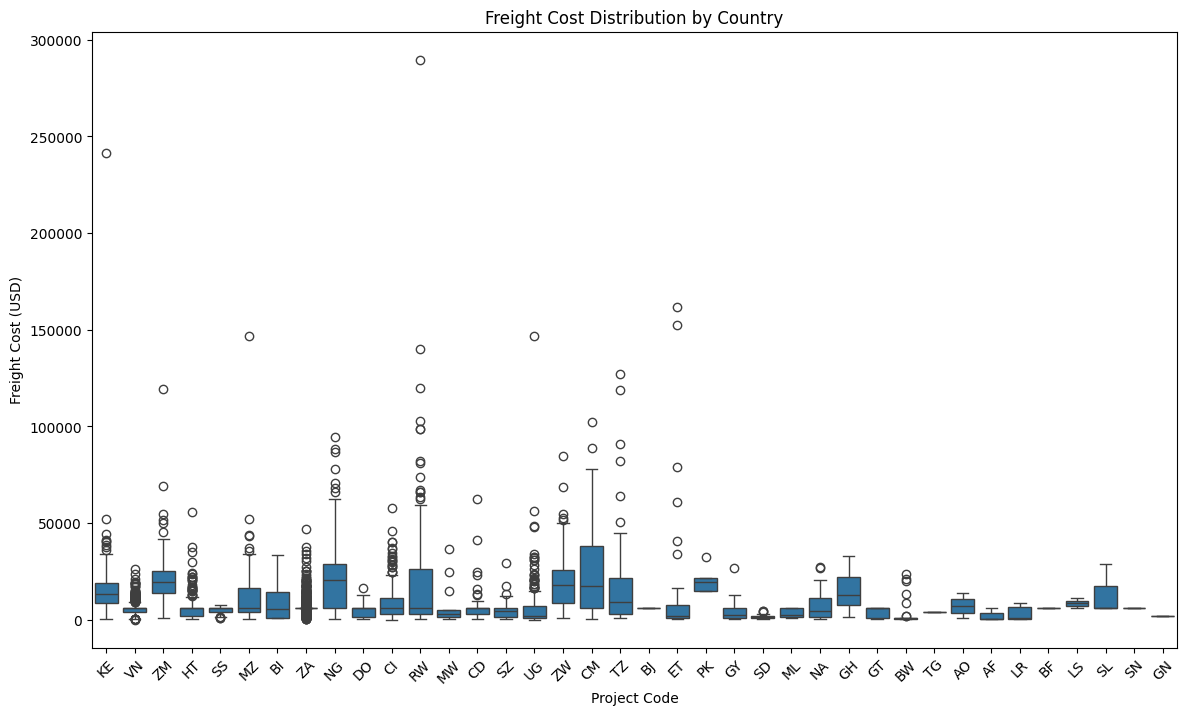

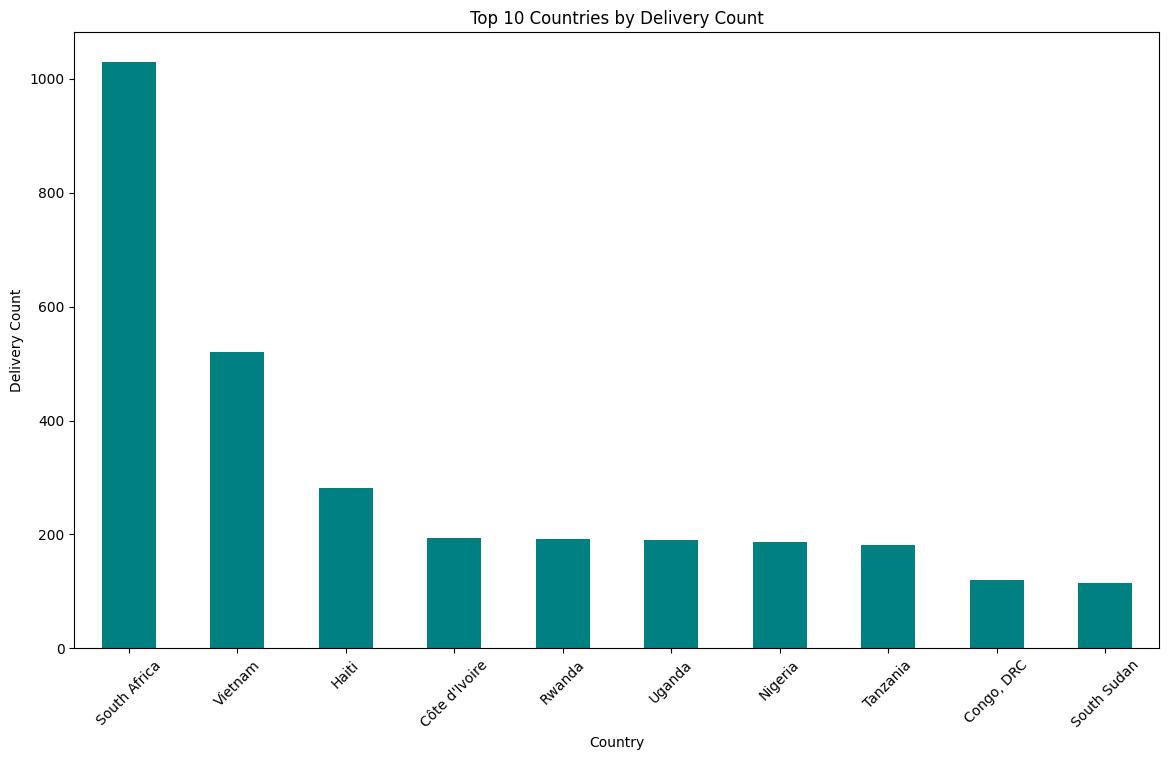

In [ ]:
# Exploring the dataset for visualizations


# Plot 1: Boxplot of Delivery Cost by Country
plt.figure(figsize=(14, 8))
sns.boxplot(x="Project Code", y="Freight Cost (USD)", data=df)
plt.title("Freight Cost Distribution by Country")
plt.xticks(rotation=45)
plt.ylabel("Freight Cost (USD)")
plt.show()


# Plot 2: Geographic Visualization (Barplot for Delivery Count by Country)
if 'Country' in df.columns:
    delivery_count_by_country = df['Country'].value_counts()

    plt.figure(figsize=(14, 8))
    delivery_count_by_country[:10].plot(kind='bar', color='teal')
    plt.title("Top 10 Countries by Delivery Count")
    plt.xlabel("Country")
    plt.ylabel("Delivery Count")
    plt.xticks(rotation=45)
    plt.show()


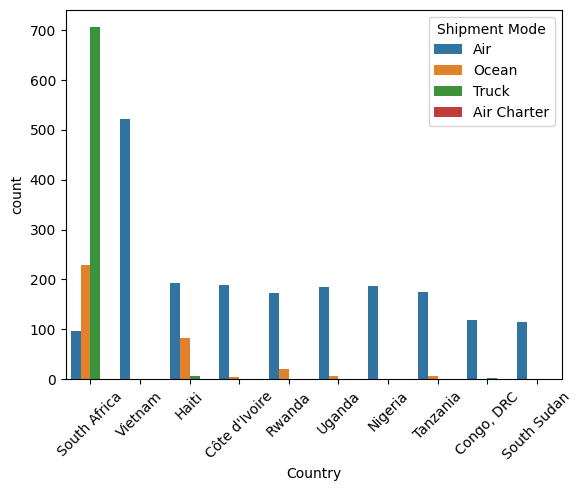

In [ ]:
#Exploring Countries with their Type of Shipment Mode

top_10_countries = df["Country"].value_counts().head(10)
sns.countplot(data=df,x="Country",order=top_10_countries.index,hue="Shipment Mode")
plt.xticks(rotation=45)
plt.show()

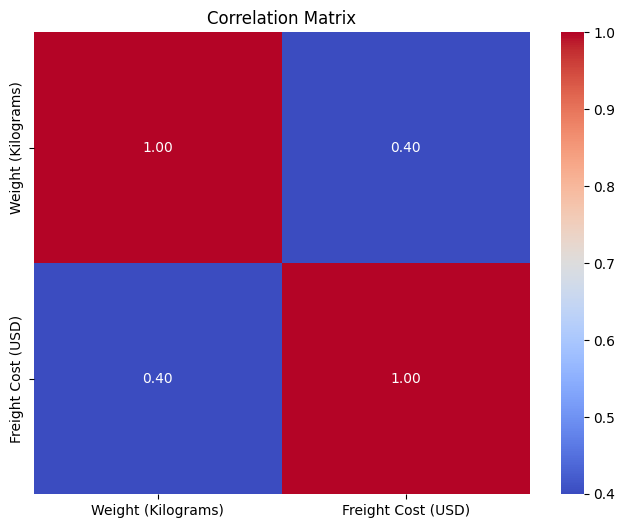

In [ ]:
#Exploring the correlation of the weight and Freight Cost
correlation_matrix = df[["Weight (Kilograms)", "Freight Cost (USD)"]].corr()  #40% approx they are positively correlated

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


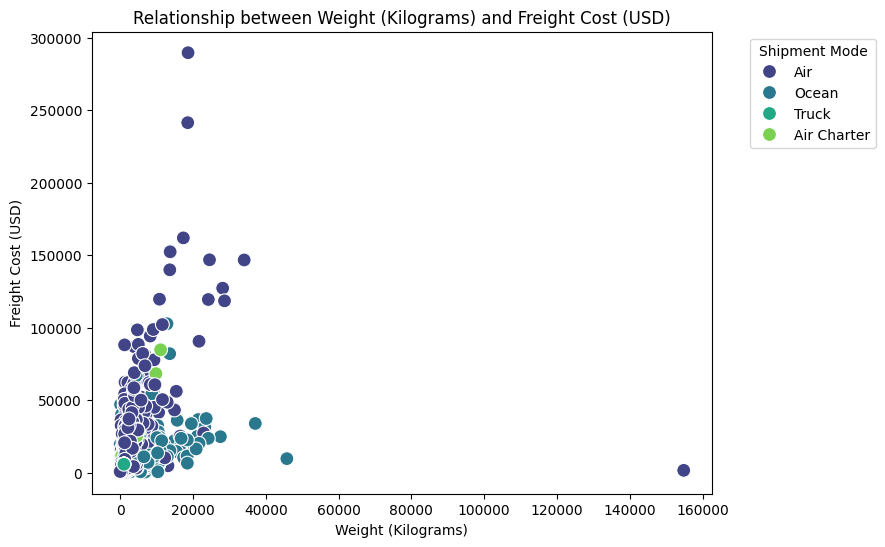

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["Weight (Kilograms)"], y=df["Freight Cost (USD)"], hue=df["Shipment Mode"], palette="viridis", s=100)
plt.title("Relationship between Weight (Kilograms) and Freight Cost (USD)")
plt.xlabel("Weight (Kilograms)")
plt.ylabel("Freight Cost (USD)")
plt.legend(title="Shipment Mode", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


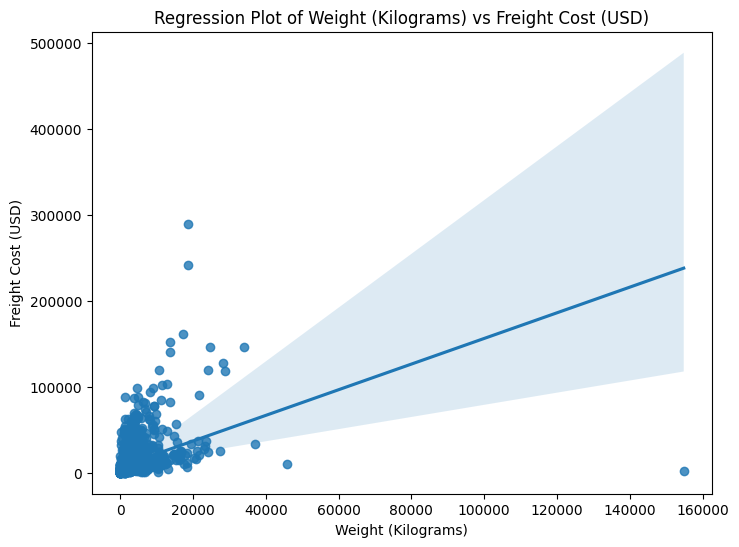

In [ ]:
#Using Regression Plot to see linear relationship between weight and freight cost by fitting a regression line
plt.figure(figsize=(8, 6))
sns.regplot(x=df["Weight (Kilograms)"], y=df["Freight Cost (USD)"])
plt.title("Regression Plot of Weight (Kilograms) vs Freight Cost (USD)")
plt.xlabel("Weight (Kilograms)")
plt.ylabel("Freight Cost (USD)")
plt.show()


# **Dropping Unnecessary Columns**

In [ ]:
columns_to_drop = ["ID","PQ #","PO / SO #","ASN/DN #","Fulfill Via","Item Description","Molecule/Test Type","Dosage","Dosage Form","Unit of Measure (Per Pack)","Line Item Quantity","Line Item Value",
"Pack Price","Unit Price","Manufacturing Site","First Line Designation","Line Item Insurance (USD)","Delivery Recorded Date"]

df.drop(columns=columns_to_drop,inplace=True)

In [ ]:
df.shape

(3842, 15)

# Dealing with Delivery Dates

In [ ]:
df["Delivery Time(days)"]=df["Scheduled Delivery Date"]-df["PO Sent to Vendor Date"]
df["Delay in Delivery(days)"]=df["Delivered to Client Date"]-df["Scheduled Delivery Date"]

In [ ]:
df["Delivery Time(days)"]=df["Delivery Time(days)"].astype(str).str.split(pat=" ",expand=True)[0].apply(lambda x:x.strip())
df["Delay in Delivery(days)"]=df["Delay in Delivery(days)"].astype(str).str.split(pat=" ",expand=True)[0].apply(lambda x:x.strip())

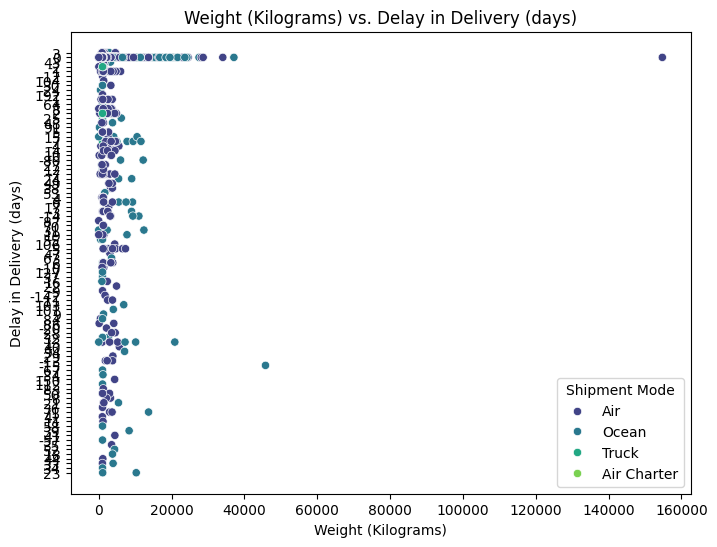

In [ ]:
#Exploring relationship between the Weight and Delay in Delivery

plt.figure(figsize=(8, 6))
sns.scatterplot(x="Weight (Kilograms)", y="Delay in Delivery(days)", data=df, hue="Shipment Mode", palette="viridis")
plt.title("Weight (Kilograms) vs. Delay in Delivery (days)")
plt.xlabel("Weight (Kilograms)")
plt.ylabel("Delay in Delivery (days)")
plt.show()
#There is no linear relationship between the weight and delay in delivery

In [ ]:
# As we have got the number of days for delivery and delay hence dropping the extra columns
df.drop(columns=["PO Sent to Vendor Date","Scheduled Delivery Date","Delivered to Client Date","PQ First Sent to Client Date"],inplace=True)

# Label Encoding For Categorical Values

In [ ]:
#For categorical values we are using Label encoder

from sklearn.preprocessing import LabelEncoder
df = df.apply(LabelEncoder().fit_transform)

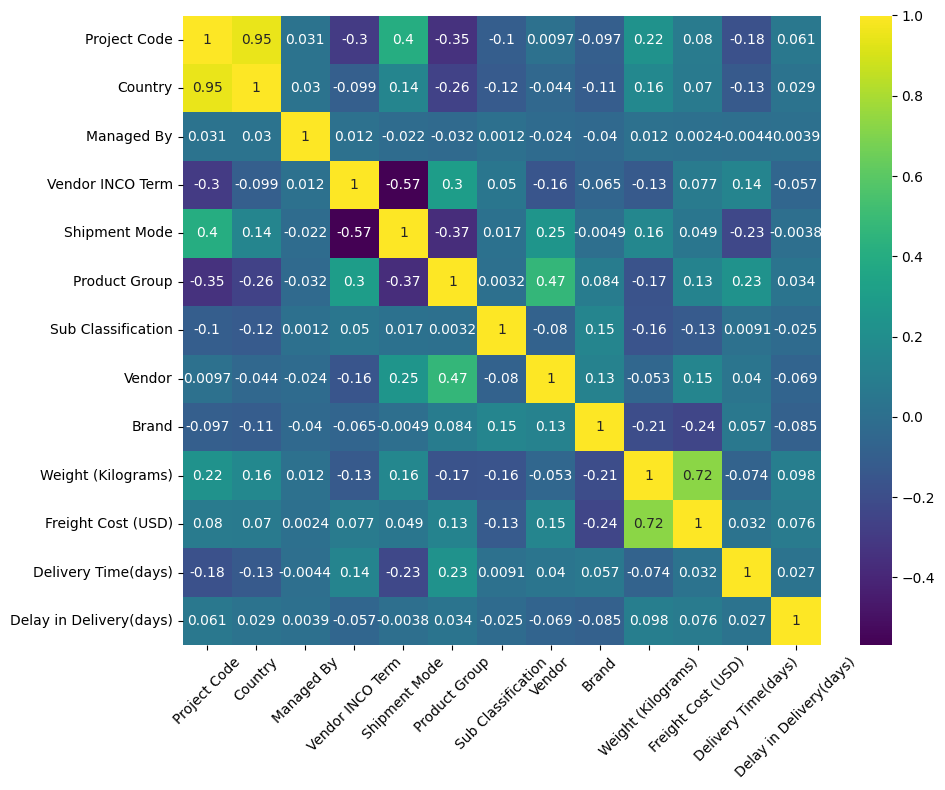

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,cmap="viridis")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Train Test Spilt

In [ ]:
train_df = df.loc[:,["Shipment Mode","Freight Cost (USD)","Project Code","Country","Vendor INCO Term","Product Group","Sub Classification","Brand","Weight (Kilograms)"]]

In [ ]:
#Defining the X and y
X = train_df.iloc[:,1:].values
y=train_df.iloc[:,0].values

In [ ]:
from sklearn.model_selection import train_test_split,GridSearchCV
X_train,x_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=42)

# Importing Different ML Models

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,r2_score,precision_score,recall_score,f1_score,roc_auc_score

In [ ]:
models = {
    "Random Forest": RandomForestClassifier(),
    "Support Vector Classification": SVC(),
    "Logistic Regression":LogisticRegression(),
    "KNN":KNeighborsClassifier()

}

# Model Training and evaluation

In [ ]:
from sklearn.preprocessing import StandardScaler


# Scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Ensures X_train is 2D
X_test_scaled = scaler.transform(x_test)       # Ensures X_test is 2D


# Define models
models = {
    "Random Forest": RandomForestClassifier(),
    "Support Vector Classification": SVC(probability=True, random_state=42),
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier()
}

# Update evaluation function
def evaluate_score(model, x_test, y_test):
    y_pred = model.predict(x_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average="weighted", zero_division=0)
    recall = recall_score(y_test, y_pred, average="weighted")
    f1 = f1_score(y_test, y_pred, average="weighted")
    roc_auc = roc_auc_score(y_test, model.predict_proba(x_test), multi_class="ovr", average="weighted") if hasattr(model, "predict_proba") else "N/A"

    return {
        "Model": type(model).__name__,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "ROC AUC": roc_auc,
    }

# Retrain models on scaled data
results_scaled = []
for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)
    score = evaluate_score(model, X_test_scaled, y_test)
    results_scaled.append(score)

# Convert results to DataFrame
df_results_scaled = pd.DataFrame(results_scaled)
df_results_scaled


,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC
0,RandomForestClassifier,0.964889,0.965620,0.964889,0.964771,0.992750
1,SVC,0.937581,0.933016,0.937581,0.934344,0.983923
2,LogisticRegression,0.914174,0.906889,0.914174,0.909608,0.966174
3,KNeighborsClassifier,0.951886,0.952242,0.951886,0.951297,0.984024


In [ ]:
#Comparing the F1 score of all the models in descending order
df_sorted_results= df_results_scaled.sort_values(by="F1 Score",ascending=False)

#Creating a bar graph using plotly
fig = px.bar(df_sorted_results, x='Model', y='F1 Score',color="Model")

# Updating the layout
fig.update_layout( title="F1 Score of Models",
xaxis_title="Model",
yaxis_title="F1 Score",
xaxis={"categoryorder": "total descending"})
fig.show()

# **Hyperparameter Tuning**

In [ ]:

# Hyperparameter tuning for RandomForestClassifier
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='accuracy', cv=5, verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Evaluate the tuned model
best_rf = grid_search.best_estimator_
final_score = evaluate_score(best_rf, x_test, y_test)
print("Tuned Model Performance:", final_score)


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 150}
Best Score: 0.947937819443341
Tuned Model Performance: {'Model': 'RandomForestClassifier', 'Accuracy': 0.9687906371911573, 'Precision': 0.9687126176778103, 'Recall': 0.9687906371911573, 'F1 Score': 0.9684905421240607, 'ROC AUC': 0.992432226292134}


Since after hyperparameter tuning the results are almost same with an ROC_SCORE of 99%  hence going with that model only with the previous adjusted parameters

# **Observations:**

**Shipment Mode:**
Most of the shipments are done via Air, followed by Truck and then Ocean. This is likely due to Air being the fastest mode of transportation for the goods delivered and due to higher perishability and fragile goods.

**Freight Cost:**
Freight Cost (USD) has a wide range, with most of the cost associated with the shipment mode Air (Fastest Delivery), followed by Truck. This is expected as Air and Truck shipment involves higher costs.

**Project Code:** The majority of the deliveries are for projects in South Africa, followed by Nigeria and then Haiti. This is due to urgent product needs for these countries with higher life expectancy (Inferred from Project Code).

**Country:**
The dataset contains shipments to various countries, with Nigeria and South Africa being the most frequent. The type of products sent to these countries is urgent in nature and thus involves high shipment cost.

**Weight (Kilograms):** The weight of the shipments has a positive correlation with the freight cost, but we can see that the weight is fairly small given the freight costs incurred. The heavier shipments tend to have higher costs, which is logical. It is possible that we are dealing with products of high individual value like Medicines.

**Delivery Time & Delay:** There is a delay in delivering most of the orders, which is quite logical but the magnitude varies across different countries and projects. There is no relation between weight and delay in delivery.

**ML Model:**
Random Forest has the highest F1 anD ROC_AUC score of 99% out of all the metrics. Hence This model will be used for prediction for Supply Chain Shipment Mode